# Predicting Coding Language in 'Games' Readmes
**Author: Arsene Boundaone, Cayt Schlichting, Paige Rackley**<br>
*Audience: *

**Project Goal:**  The goal of this project is to use natural language processing and classification models to identify terms for predicting a readme's primary language on Github.


**Jump to Section:** &ensp;   [Acquisition and Prep](#acq-prep) - [Exploration](#explore) - [Modeling](#modeling) - [Conclusion](#ConclusionC88)

In [1]:
# Ignoring warning messages from python
import warnings
warnings.filterwarnings('ignore')

#Basics
import numpy as np
import pandas as pd
from IPython.display import Markdown, display

#Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette='colorblind') #set theme for all viz

#modeling and stats

#Modules
import prepare as prep
import utils

# Modeling imports
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

***
## Data Acquisition and Preparation  <a class="anchor" id="acq-prep">
***

**Source:** Web scrapping of Github search results. The first 500 repos with the keyword of 'games' on the search date of July 22, 2022 were used.

**Filtering:**
> - Any repos without readmes or without a language were dropped.
> - Any repos whose language occured less than 10 times in the dataset were dropped.

**Cleaning on Readme Contents:**
> - Normalized to unicode and ascii
> - Removed markdown character strings such as '\n', '\r', '(http..', '##', etc
> - Removed any characteres that were not: a-z, 0-9, #, apostrophe, or space
> - Stripped whitespace


##### Acquire, Prep and Split data

In [2]:
#Acquisition and Prep
df = prep.prep_data()

In [3]:
#split
train, validate, test = prep.split_data(df)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 115 to 153
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   repo      197 non-null    object
 1   language  197 non-null    object
 2   content   197 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


***
## Exploration  <a class="anchor" id="explore" />
***
*More exploration can be found in the supporting notebooks*


##### Target variable distribution

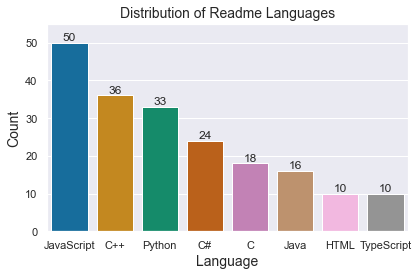

In [16]:
utils.plot_target_distro(train)

### Question 1?

<div class="alert alert-success"><b>Alt Question format</b></div>

In [17]:
display(Markdown('### Alt question format using markdown'))
#Do Visualizations

### Alt question format using markdown

**Notes:**

### Question 2?

<div class="alert alert-success"><b>Alt Question format</b></div>

In [ ]:
#Do Visualizations

**Notes:**

### Question 3?

<div class="alert alert-success"><b>Alt Question format</b></div>

In [ ]:
#Do Visualizations

**Notes:**

### Question 3?

<div class="alert alert-success"><b>Alt Question format</b></div>

In [ ]:
#Do Visualizations

**Notes:**

### Exploration Summary:

> - 
> - 
> - 


***
## Modeling <a class="anchor" id="modeling" />
***
*More modeling can be found in the supporting notebooks*
    
**Model Evaluation:**

In [5]:
# Vectorizing and 'learning' on train dataset

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train.content)
y_train = train.language

In [6]:
# Applying the vectorization without giving out the content of validate
X_validate = tfidf.transform(validate.content)
y_validate = validate.language

In [7]:
# Applying the vectorization without giving out the content of validate
X_test = tfidf.transform(test.content)
y_test = test.language

>### Creating a baseline

In [8]:
# Creating a dataframe of the target variable for creating a baseline
y_train_df = pd.DataFrame(dict(actual=y_train))

# Since JavaScript has the highest occurence I'll use it as positive case
y_train_df['baseline'] = y_train_df['actual'] == 'JavaScript'

# Calculating the baseline model
print(f'The baseline model has an average capture rate for Javascript of: {y_train_df.baseline.mean():.2%}')

The baseline model has an average capture rate for Javascript of: 25.38%


>### Logistic Regression Model

In [10]:
# Logistic Regression Default setup on validate dataset
lm = LogisticRegression().fit(X_train, y_train)
y_validate_pred = lm.predict(X_validate)

# Printing the accuracy value, the confusion matrix, and the classification report
print('Accuracy: {:.2%}'.format(accuracy_score(y_validate, y_validate_pred)))
print('------------------')
print('Confusion Matrix')
print(pd.crosstab(y_validate_pred, y_validate))
print('------------------')
print('Classification Report')
print('\n')
print(classification_report(y_validate, y_validate_pred))

Accuracy: 45.88%
------------------
Confusion Matrix
language    C  C#  C++  HTML  Java  JavaScript  Python  TypeScript
row_0                                                             
C           1   0    0     0     0           0       0           0
C#          0   2    0     0     0           0       0           0
C++         1   0    6     0     3           0       1           0
HTML        0   0    0     2     0           0       0           0
JavaScript  5   9    9     2     4          22       7           4
Python      0   0    1     0     0           0       6           0
------------------
Classification Report


              precision    recall  f1-score   support

           C       1.00      0.14      0.25         7
          C#       1.00      0.18      0.31        11
         C++       0.55      0.38      0.44        16
        HTML       1.00      0.50      0.67         4
        Java       0.00      0.00      0.00         7
  JavaScript       0.35      1.00      0.52

>### Random Forest Classifier Model

In [12]:
# Random Forest Default setup on validate dataset
for i in range(3, 13):
    multi_depth = RandomForestClassifier(max_depth=i, random_state=175)

    all_rf = multi_depth.fit(X_train, y_train)

    y_pred_validate_rfc = all_rf.predict(X_validate)

    report = classification_report(y_validate, y_pred_validate_rfc, output_dict=True)
    print(f'RandomForest depth {i}\n')
    print(pd.DataFrame(report))
    print('\n=======================\n')

RandomForest depth 3

             C    C#        C++      HTML  Java  JavaScript     Python  \
precision  0.0   0.0   0.600000  1.000000   0.0    0.285714   1.000000   
recall     0.0   0.0   0.187500  0.500000   0.0    1.000000   0.071429   
f1-score   0.0   0.0   0.285714  0.666667   0.0    0.444444   0.133333   
support    7.0  11.0  16.000000  4.000000   7.0   22.000000  14.000000   

           TypeScript  accuracy  macro avg  weighted avg  
precision         0.0  0.329412   0.360714      0.398655  
recall            0.0  0.329412   0.219866      0.329412  
f1-score          0.0  0.329412   0.191270      0.222148  
support           4.0  0.329412  85.000000     85.000000  


RandomForest depth 4

             C         C#        C++      HTML  Java  JavaScript     Python  \
precision  0.0   0.500000   0.625000  1.000000   0.0    0.309859   0.500000   
recall     0.0   0.090909   0.312500  0.500000   0.0    1.000000   0.071429   
f1-score   0.0   0.153846   0.416667  0.666667   0.

>### K-Nearest Neighbor Classifier

In [14]:
# KNN Default values on validate dataset
for i in range(3, 13):
    knn_depth = KNeighborsClassifier(n_neighbors=i)

    all_knn = knn_depth.fit(X_train, y_train)

    y_val_pred_knn = all_knn.predict(X_validate)

    report = classification_report(y_validate, y_val_pred_knn, output_dict=True)
    print(f'KNN depth {i}\n')
    print(pd.DataFrame(report))
    print('\n=======================\n')

KNN depth 3

                  C    C#        C++      HTML  Java  JavaScript  Python  \
precision  0.060606   0.0   0.500000  1.000000   0.0    0.666667     0.0   
recall     0.571429   0.0   0.437500  0.500000   0.0    0.090909     0.0   
f1-score   0.109589   0.0   0.466667  0.666667   0.0    0.160000     0.0   
support    7.000000  11.0  16.000000  4.000000   7.0   22.000000    14.0   

           TypeScript  accuracy  macro avg  weighted avg  
precision         0.0  0.176471   0.278409      0.318717  
recall            0.0  0.176471   0.199980      0.176471  
f1-score          0.0  0.176471   0.175365      0.169652  
support           4.0  0.176471  85.000000     85.000000  


KNN depth 4

                  C         C#        C++      HTML  Java  JavaScript  \
precision  0.150000   0.600000   0.571429  1.000000   0.0    0.750000   
recall     0.857143   0.272727   0.500000  0.500000   0.0    0.545455   
f1-score   0.255319   0.375000   0.533333  0.666667   0.0    0.631579   
supp

In [15]:
# K-Nearest Neighbor on the test dataset

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_test_knn = knn.predict(X_test)
report = classification_report(y_test, y_pred_test_knn, output_dict=True)
print('Classification Report on test dataset')
print('\n=======================\n')
print(pd.DataFrame(report))

Classification Report on test dataset


                  C        C#        C++      HTML  Java  JavaScript  \
precision  0.333333  0.307692   0.275862  1.000000   0.0    0.307692   
recall     0.333333  0.444444   0.615385  0.333333   0.0    0.222222   
f1-score   0.333333  0.363636   0.380952  0.500000   0.0    0.258065   
support    6.000000  9.000000  13.000000  3.000000   6.0   18.000000   

              Python  TypeScript  accuracy  macro avg  weighted avg  
precision   0.714286         0.0  0.338028   0.367358      0.358667  
recall      0.416667         0.0  0.338028   0.295673      0.338028  
f1-score    0.526316         0.0  0.338028   0.295288      0.319522  
support    12.000000         4.0  0.338028  71.000000     71.000000  


### Modeling Summary:

> - The three models performance on validate:  
        * Logistic Regression Accuracy 45.88% Precision 35%  
        * Random Forest  Classifier Accuracy 45.88% Precision 33.87%  
        * K-Nearest Neighbor Accuracy 47.05% Precision 75%  
  - The K-Nearest Neighbor is the best model of the three and beast the Baseline by 21.67 points.  
> - After running the K-Nearest Neighbor model on the test dataset we obtain a 33.8% Accuracy with a 30.76% Precision  
  - This beats the Baseline by 8.42 points  
> - Our model is able to predict the language used to build game based on the README content slightly better than the baseline.

***
## Conclusion <a class="anchor" id="ConclusionC88" />
***

**Goal Recap:** 

**Key Findings:**
> - 
> -
> - 
> -

**Recommendations:**
> - 
> - 


**Next Steps:**
> - 
> -


***
## Appendix:
***

*place for more complex graphs and implications relevant for next steps.  Or just add extra details that I don't want to take away from the rest of the report*